<a href="https://colab.research.google.com/github/hnioua/Introduction-to-Machine-Learning-/blob/main/CodeR%C3%A9gressionLin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Régression Linéaire Simple avec Numpy



In [19]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

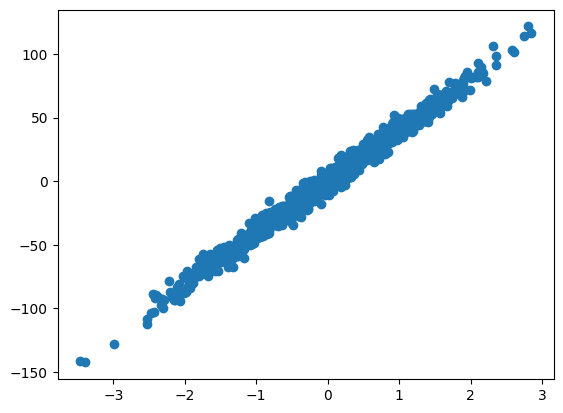

In [20]:
x, y = make_regression(n_samples=1000, n_features=1, noise=5)
plt.scatter(x, y) # afficher les résultats.

In [21]:
print(x.shape)
print(y.shape)

(1000, 1)
(1000,)


In [22]:
# redimensionner y. On remarque que n'y a pas les dimensions(100,1)
# on corrige le problème avec np.reshape
y = y.reshape(y.shape[0], 1)
print(y.shape)

(1000, 1)


In [23]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
X

(1000, 2)


array([[ 0.24128887,  1.        ],
       [ 0.32577708,  1.        ],
       [ 0.17292814,  1.        ],
       ...,
       [-1.27135474,  1.        ],
       [ 0.09788785,  1.        ],
       [ 0.72862869,  1.        ]])

In [24]:
theta = np.random.randn(2, 1)
theta

array([[0.83426098],
       [0.02279374]])

2. Modèle Linéaire

In [25]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

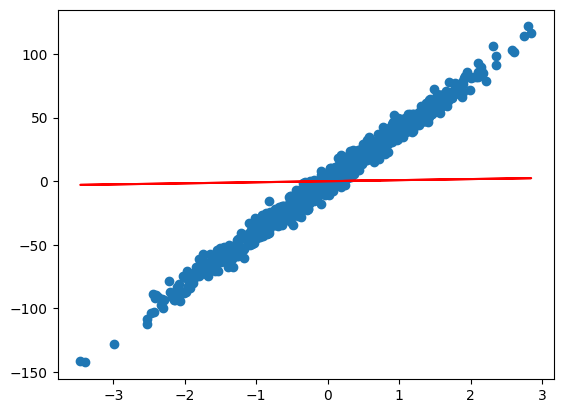

In [26]:
def model(X, theta):
    return X.dot(theta)
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

3. Fonction Cout

In [27]:
cost_function(X, y, theta)

np.float64(805.1504752186545)

 4. Gradients et Descente de Gradient

In [28]:
def grad(X, y, theta):
    m = len(y)
    XT = np.transpose(X)
    return 1/m * XT.dot(model(X, theta) - y)

In [29]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)# création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)# mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta)# on enregistre la valeur du Cout au tour i dans cost_history[i]
    return theta, cost_history

5. Phase d'entrainement

In [30]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=400)

In [31]:
theta_final# voici les parametres du modele une fois que la machine a été entrainée

array([[39.61468572],
       [-0.0732464 ]])

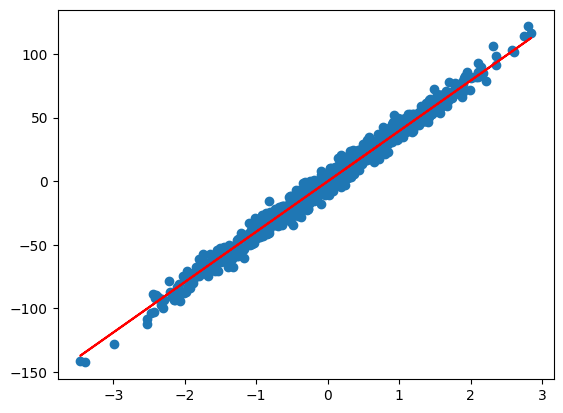

In [32]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

6. Courbes d'apprentissage

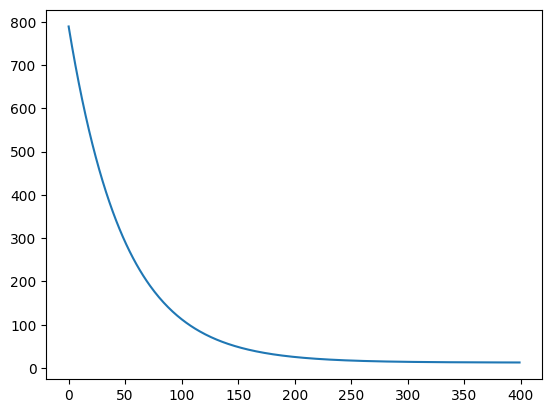

In [33]:
plt.plot(range(400), cost_history)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


7. Evaluation finale

In [34]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [35]:
coef_determination(y, predictions)

np.float64(0.9849014535509151)